# VERİ ÖNİŞLEME

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
veri = pd.read_csv("../Veri toplama/emlak_veri.csv")

Bu aşamada veriye bakıp boş hatalı kolonları ve fiyata etki etmeyeceğini düşündüğüm kolonları siliyorum.

In [3]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ada                            13 non-null     object 
 1   Aidat                          114 non-null    object 
 2   Balkon Durumu                  402 non-null    object 
 3   Balkon Metrekare               15 non-null     object 
 4   Balkon SayÄ±sÄ±                2 non-null      float64
 5   Balkon Sayısı                  226 non-null    object 
 6   Balkon Tipi                    105 non-null    object 
 7   Balkon Tipi Kapalı Teras       1 non-null      object 
 8   Banyo Metrekare                18 non-null     object 
 9   Banyo SayÄ±sÄ±                 5 non-null      float64
 10  Banyo Sayısı                   803 non-null    object 
 11  BinanÄ±n Kat SayÄ±sÄ±          5 non-null      float64
 12  BinanÄ±n YaÅŸÄ±                5 non-null      obj

In [4]:
atilacak_sutunlar = ["Aidat","Yapı Durumu","WC Sayısı","Pafta","Parsel","Salon Metrekare","WC Metrekare","Kattaki Daire Sayısı","Kira Getirisi","Balkon Sayısı","Balkon Tipi","Balkon Tipi Kapalı Teras","Banyo Metrekare","Görüntülü Gezilebilir mi?","Balkon Metrekare","Ada","Aidat","link","İpotek Durumu","İlan Oluşturma Tarihi","İlan Numarası","İlan Güncelleme Tarihi","Ä°lan OluÅŸturma Tarihi","Ä°lan NumarasÄ±","Ä°lan GÃ¼ncelleme Tarihi","Zemin Etüdü","Zemin EtÃ¼dÃ¼","YatÄ±rÄ±ma Uygunluk","YapÄ± Tipi","YapÄ± Durumu","WC SayÄ±sÄ±","TÃ¼rÃ¼","Site Ä°Ã§erisinde","Oda SayÄ±sÄ±","KullanÄ±m Durumu","IsÄ±tma Tipi","GÃ¶rÃ¼ntÃ¼lÃ¼ Gezilebilir mi?","EÅŸya Durumu","BulunduÄŸu Kat","BrÃ¼t Metrekare","BinanÄ±n YaÅŸÄ±","BinanÄ±n Kat SayÄ±sÄ±","Banyo SayÄ±sÄ±","Balkon SayÄ±sÄ±"]
veri = veri.drop(columns=atilacak_sutunlar, axis=1)

Yeni haline bakiyorum

In [5]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Balkon Durumu       402 non-null    object 
 1   Banyo Sayısı        803 non-null    object 
 2   Binanın Kat Sayısı  803 non-null    float64
 3   Binanın Yaşı        803 non-null    object 
 4   Brüt Metrekare      803 non-null    object 
 5   Bulunduğu Kat       754 non-null    object 
 6   Eşya Durumu         636 non-null    object 
 7   Fiyat Durumu        808 non-null    object 
 8   Isıtma Tipi         803 non-null    object 
 9   Kategorisi          808 non-null    object 
 10  Krediye Uygunluk    808 non-null    object 
 11  Kullanım Durumu     803 non-null    object 
 12  Net Metrekare       808 non-null    object 
 13  Oda Sayısı          803 non-null    object 
 14  Site İçerisinde     803 non-null    object 
 15  Takas               665 non-null    object 
 16  Tapu Dur

In [6]:
veri.head(50) # Burada yapi tipini dikkatimi dikkatimi cekti. Atmaya karar verdim cunku hepsi ayni betonarme degerini almis

,Balkon Durumu,Banyo Sayısı,Binanın Kat Sayısı,Binanın Yaşı,Brüt Metrekare,Bulunduğu Kat,Eşya Durumu,Fiyat Durumu,Isıtma Tipi,Kategorisi,...,Net Metrekare,Oda Sayısı,Site İçerisinde,Takas,Tapu Durumu,Tipi,Türü,Yapı Tipi,Yatırıma Uygunluk,fiyat
0,Var,1,5.0,0 (Yeni),100 M2,1.Kat,Boş,Genel Fiyat,Kombi Doğalgaz,Satılık,...,95 M2,2+1,Hayır,NaN,NaN,Daire,Konut,NaN,NaN,1.655.000 TL
1,NaN,1,4.0,4,100 M2,3.Kat,NaN,Genel Fiyat,Kombi Doğalgaz,Satılık,...,95 M2,2+1,Hayır,Yok,Bilinmiyor,Daire,Konut,Betonarme,Bilinmiyor,1.100.000 TL
2,NaN,1,13.0,4,90 M2,6.Kat,NaN,Genel Fiyat,Kombi Doğalgaz,Satılık,...,70 M2,1+1,Hayır,Yok,Bilinmiyor,Daire,Konut,Betonarme,Yatırıma Uygun,1.259.000 TL
3,Var,1,4.0,0 (Yeni),110 M2,1.Kat,NaN,Genel Fiyat,Kombi Doğalgaz,Satılık,...,95 M2,2+1,Hayır,Var,Kat Mülkiyeti,Daire,Konut,Betonarme,Yatırıma Uygun,2.699.000 TL
4,Var,1,5.0,0 (Yeni),110 M2,2.Kat,NaN,Genel Fiyat,Kombi Doğalgaz,Satılık,...,100 M2,2+1,Hayır,NaN,Kat Mülkiyeti,Daire,Konut,NaN,Yatırıma Uygun,1.750.000 TL
5,Var,1,3.0,0 (Yeni),140 M2,3.Kat,NaN,Genel Fiyat,Kombi Doğalgaz,Satılık,...,125 M2,3+1,Hayır,Var,NaN,Daire,Konut,NaN,Yatırıma Uygun,2.750.000 TL
6,Var,1,5.0,0 (Yeni),105 M2,3.Kat,Boş,Genel Fiyat,Kombi Doğalgaz,Satılık,...,100 M2,2+1,Hayır,Var,Kat Mülkiyeti,Daire,Konut,Betonarme,Yatırıma Uygun,999.999 TL
7,Var,1,17.0,4,85 M2,11.Kat,Eşyalı,Genel Fiyat,Kombi Doğalgaz,Satılık,...,65 M2,1+1,Hayır,Var,Kat Mülkiyeti,Daire,Konut,Betonarme,Yatırıma Uygun,1.590.000 TL
8,NaN,2,5.0,0 (Yeni),135 M2,1.Kat,Boş,Genel Fiyat,Kombi Doğalgaz,Satılık,...,120 M2,3+1,Hayır,Var,Kat Mülkiyeti,Daire,Konut,Betonarme,Yatırıma Uygun,3.749.000 TL
9,Var,1,22.0,5-10,110 M2,10.Kat,Boş,Genel Fiyat,Kombi Doğalgaz,Satılık,...,100 M2,2+1,Hayır,Var,Kat İrtifakı,Daire,Konut,Betonarme,Yatırıma Uygun,1.759.000 TL


In [7]:
veri = veri.drop("Yapı Tipi",axis = 1)

In [8]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Balkon Durumu       402 non-null    object 
 1   Banyo Sayısı        803 non-null    object 
 2   Binanın Kat Sayısı  803 non-null    float64
 3   Binanın Yaşı        803 non-null    object 
 4   Brüt Metrekare      803 non-null    object 
 5   Bulunduğu Kat       754 non-null    object 
 6   Eşya Durumu         636 non-null    object 
 7   Fiyat Durumu        808 non-null    object 
 8   Isıtma Tipi         803 non-null    object 
 9   Kategorisi          808 non-null    object 
 10  Krediye Uygunluk    808 non-null    object 
 11  Kullanım Durumu     803 non-null    object 
 12  Net Metrekare       808 non-null    object 
 13  Oda Sayısı          803 non-null    object 
 14  Site İçerisinde     803 non-null    object 
 15  Takas               665 non-null    object 
 16  Tapu Dur

Sütunların ismini üstünde oynayabileceğim şekilde değiştiriyorum

In [9]:
veri = veri.rename(columns = {
    "Balkon Durumu":"balkon_durumu",
    "Banyo Sayısı":"banyo_sayisi",
    "Binanın Kat Sayısı":"bina_kat_sayisi",
    "Binanın Yaşı":"bina_yasi",
    "Brüt Metrekare":"brut_metrekare",
    "Bulunduğu Kat":"kat",
    "Eşya Durumu":"esya_durumu",
    "Fiyat Durumu":"fiyat_durumu",
    "Isıtma Tipi":"isitma_tipi",
    "Kategorisi":"kategori",
    "Krediye Uygunluk":"kredi_uygunluk",
    "Kullanım Durumu":"kullanim_durumu",
    "Net Metrekare":"net_metrekare",
    "Oda Sayısı":"oda_sayisi",
    "Site İçerisinde":"site",
    "Takas":"takas",
    "Tapu Durumu":"tapu_durumu",
    "Tipi":"tip",
    "Türü":"tur",
    "Yapı Tipi":"yapi_tipi",
    "Yatırıma Uygunluk":"yatirima_uygunluk",
    "fiyat":"fiyat"   
})

In [10]:
veri.columns

Index(['balkon_durumu', 'banyo_sayisi', 'bina_kat_sayisi', 'bina_yasi',
       'brut_metrekare', 'kat', 'esya_durumu', 'fiyat_durumu', 'isitma_tipi',
       'kategori', 'kredi_uygunluk', 'kullanim_durumu', 'net_metrekare',
       'oda_sayisi', 'site', 'takas', 'tapu_durumu', 'tip', 'tur',
       'yatirima_uygunluk', 'fiyat'],
      dtype='object')

Bu aşamadan sonra elimde kalan sütünlara tek tek bakcağım

Burada balkon sütununda boş değer olduğunu farkediyorum ve en çok Var değeri olduğu için NaN değerleri var ile dolduruyorum.

In [11]:
veri.balkon_durumu.value_counts()

balkon_durumu
Var    364
Yok     38
Name: count, dtype: int64

In [12]:
veri['balkon_durumu'].fillna('Var', inplace=True)

Burada banyo sayısında farklı türde veri girişlerini gördüğüm için daha sonrasında rahat edebilmek adına string olan değerleri int yapıyorum.

In [13]:
veri.banyo_sayisi.value_counts()
veri.loc[veri.banyo_sayisi == "6+","banyo_sayisi"] = "6"
veri.loc[veri.banyo_sayisi == "Yok","banyo_sayisi"] = "0"
veri['banyo_sayisi'].fillna('1', inplace=True)
veri.info()
veri.banyo_sayisi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   balkon_durumu      810 non-null    object 
 1   banyo_sayisi       810 non-null    object 
 2   bina_kat_sayisi    803 non-null    float64
 3   bina_yasi          803 non-null    object 
 4   brut_metrekare     803 non-null    object 
 5   kat                754 non-null    object 
 6   esya_durumu        636 non-null    object 
 7   fiyat_durumu       808 non-null    object 
 8   isitma_tipi        803 non-null    object 
 9   kategori           808 non-null    object 
 10  kredi_uygunluk     808 non-null    object 
 11  kullanim_durumu    803 non-null    object 
 12  net_metrekare      808 non-null    object 
 13  oda_sayisi         803 non-null    object 
 14  site               803 non-null    object 
 15  takas              665 non-null    object 
 16  tapu_durumu        459 non

0      1
1      1
2      1
3      1
4      1
      ..
805    2
806    1
807    2
808    1
809    2
Name: banyo_sayisi, Length: 810, dtype: object

In [14]:
veri.bina_kat_sayisi.value_counts()
veri['bina_kat_sayisi'].fillna("4.0", inplace=True)
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   balkon_durumu      810 non-null    object
 1   banyo_sayisi       810 non-null    object
 2   bina_kat_sayisi    810 non-null    object
 3   bina_yasi          803 non-null    object
 4   brut_metrekare     803 non-null    object
 5   kat                754 non-null    object
 6   esya_durumu        636 non-null    object
 7   fiyat_durumu       808 non-null    object
 8   isitma_tipi        803 non-null    object
 9   kategori           808 non-null    object
 10  kredi_uygunluk     808 non-null    object
 11  kullanim_durumu    803 non-null    object
 12  net_metrekare      808 non-null    object
 13  oda_sayisi         803 non-null    object
 14  site               803 non-null    object
 15  takas              665 non-null    object
 16  tapu_durumu        459 non-null    object
 1

Burada da benzer işlemleri gerçekleştiriyorum.

In [15]:
veri.bina_yasi.value_counts()
veri.loc[veri.bina_yasi == "5-10" , "bina_yasi"] = "7"
veri.loc[veri.bina_yasi == "0 (Yeni)" , "bina_yasi"] = "0"
veri.loc[veri.bina_yasi == "21 Ve Üzeri" , "bina_yasi"] = "21"
veri.loc[veri.bina_yasi == "11-15" , "bina_yasi"] = "13"
veri.loc[veri.bina_yasi == "16-20" , "bina_yasi"] = "18"
veri['bina_yasi'].fillna("0", inplace=True)
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   balkon_durumu      810 non-null    object
 1   banyo_sayisi       810 non-null    object
 2   bina_kat_sayisi    810 non-null    object
 3   bina_yasi          810 non-null    object
 4   brut_metrekare     803 non-null    object
 5   kat                754 non-null    object
 6   esya_durumu        636 non-null    object
 7   fiyat_durumu       808 non-null    object
 8   isitma_tipi        803 non-null    object
 9   kategori           808 non-null    object
 10  kredi_uygunluk     808 non-null    object
 11  kullanim_durumu    803 non-null    object
 12  net_metrekare      808 non-null    object
 13  oda_sayisi         803 non-null    object
 14  site               803 non-null    object
 15  takas              665 non-null    object
 16  tapu_durumu        459 non-null    object
 1

Elimde net metrekare sütunu olduğu için 2 benzer sütun olacağını düşündüm ve bunu da atmaya karar verdim.

In [16]:
veri = veri.drop("brut_metrekare",axis = 1)

Burada da bahçe katı yüksek giriş gibi olanların hepsini int türünde 1 olarak düzenledim diğerleri de aynı şekilde.

In [17]:
veri['kat'] = veri['kat'].str.replace('.Kat', '')
veri.loc[veri.kat == "Bahçe Katı" , "kat"] = "1"
veri.loc[veri.kat == "Düz Giriş (Zemin)" , "kat"] = "1"
veri.loc[veri.kat == "Yüksek Giriş" , "kat"] = "1"
veri.loc[veri.kat == "Villa Tipi" , "kat"]= "1"
veri.loc[veri.kat == "Müstakil" , "kat"] = "1"
veri.loc[veri.kat == "Bahçe Dublex" , "kat"] = "1"
veri.loc[veri.kat == "Çatı Dubleks" , "kat"] = "25"
veri.loc[veri.kat == "Çatı Katı" , "kat"] = "24"
veri.loc[veri.kat == "Kot 1 (-1)" , "kat"] = "-1"
encok_tekrar_eden = veri['kat'].mode()[0]
veri['kat'].fillna(encok_tekrar_eden, inplace=True)

veri.kat.value_counts()

kat
1     332
2     146
3      98
4      59
5      38
6      25
7      21
9      13
11     12
25      9
8       9
12      9
15      7
-1      5
10      5
13      5
14      4
19      4
21      3
18      2
24      2
16      1
23      1
Name: count, dtype: int64

Çoğunluk baya bir farkla Boş olduğu için Nan değerleri de Boş olarak doldurdum.

In [18]:
veri.esya_durumu.value_counts()
veri['esya_durumu'].fillna("Boş", inplace=True)
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   balkon_durumu      810 non-null    object
 1   banyo_sayisi       810 non-null    object
 2   bina_kat_sayisi    810 non-null    object
 3   bina_yasi          810 non-null    object
 4   kat                810 non-null    object
 5   esya_durumu        810 non-null    object
 6   fiyat_durumu       808 non-null    object
 7   isitma_tipi        803 non-null    object
 8   kategori           808 non-null    object
 9   kredi_uygunluk     808 non-null    object
 10  kullanim_durumu    803 non-null    object
 11  net_metrekare      808 non-null    object
 12  oda_sayisi         803 non-null    object
 13  site               803 non-null    object
 14  takas              665 non-null    object
 15  tapu_durumu        459 non-null    object
 16  tip                808 non-null    object
 1

In [19]:
veri.fiyat_durumu.value_counts()
veri = veri.drop("fiyat_durumu",axis = 1)

Bu aşamada da farklı girilen ama aynı olanları direkt Doğalgaz türüne çevirdim

In [20]:
veri.loc[veri.isitma_tipi == "Kombi Doğalgaz" , "isitma_tipi"] = "Doğalgaz"
veri.loc[veri.isitma_tipi == "Merkezi (Pay Ölçer)" , "isitma_tipi"] = "Doğalgaz"
veri.loc[veri.isitma_tipi == "Merkezi Doğalgaz" , "isitma_tipi"] = "Doğalgaz"
veri.loc[veri.isitma_tipi == "Yerden Isıtma" , "isitma_tipi"] = "Doğalgaz"
veri.loc[veri.isitma_tipi == "Doğalgaz Sobalı" , "isitma_tipi"] = "Doğalgaz"
veri.loc[veri.isitma_tipi == "Kat Kaloriferi" , "isitma_tipi"] = "Doğalgaz"
veri['isitma_tipi'].fillna("Doğalgaz", inplace=True)
veri.isitma_tipi.value_counts()

isitma_tipi
Doğalgaz         807
Isıtma Yok         2
Merkezi Kömür      1
Name: count, dtype: int64

Burada fiyata etki etmeyeceğini düşündüğüm gerekiz 3 sütunü daha sildim

In [21]:
veri = veri.drop("kategori",axis = 1)

In [22]:
veri = veri.drop("kredi_uygunluk",axis = 1)

In [23]:
veri = veri.drop("kullanim_durumu",axis = 1)

Nan değerlere ortalama metrekareyi yerleştirebilmek için string ifadeleri yok ettim daha sonrasında numerik veri tipine dönüştürüp ortalama alma işlemi yaptım.Daha sonra da NaN değerlere bu ortalamayı yerleştirdim.

In [24]:
veri['net_metrekare'] = veri['net_metrekare'].astype(str) 
veri['net_metrekare'] = veri['net_metrekare'].str.replace('M2', '')
veri['net_metrekare'] = veri['net_metrekare'].str.replace('m2', '')
veri['net_metrekare'] = pd.to_numeric(veri['net_metrekare'], errors='coerce')
ortalama_net_metrekare = veri['net_metrekare'].mean()
veri['net_metrekare'].fillna(ortalama_net_metrekare, inplace=True)
veri.net_metrekare.value_counts()

net_metrekare
100.0    80
110.0    61
120.0    46
95.0     45
90.0     42
         ..
189.0     1
108.0     1
138.0     1
64.0      1
156.0     1
Name: count, Length: 117, dtype: int64

In [25]:
veri['oda_sayisi'].fillna("2+1", inplace=True)
veri.loc[veri.oda_sayisi == "Stüdyo" , "oda_sayisi"] = "1"
veri.loc[veri.oda_sayisi == "4.5+1" , "oda_sayisi"] = "4+1"
veri.loc[veri.oda_sayisi == "3.5+1" , "oda_sayisi"] = "3+1"
veri.loc[veri.oda_sayisi == "2.5+1" , "oda_sayisi"] = "2+1"
veri.loc[veri.oda_sayisi == "1 Oda" , "oda_sayisi"] = "1"
veri.loc[veri.oda_sayisi == "9+ Oda" , "oda_sayisi"] = "9"
veri.oda_sayisi.value_counts()

oda_sayisi
2+1    360
3+1    238
1+1     56
4+1     45
4+2     33
5+2     31
6+2     17
3+2     14
1        6
7+2      3
6+3      2
5+1      2
2+0      1
2+2      1
9        1
Name: count, dtype: int64

In [26]:
def oda_duzenleme(oda_sayisi):
    # Eğer değer None veya NaN ise, NaN döndür
    if pd.isna(oda_sayisi):
        return oda_sayisi
    # Eğer değer bir string değilse, NaN döndür
    elif not isinstance(oda_sayisi, str):
        return None
    # "+" işaretinden önceki ve sonraki sayıyı alarak topla
    else:
        sayilar = [int(sayi) for sayi in oda_sayisi.split('+')]
        return sum(sayilar)

#"Oda Sayısı" sütununu özel dönüşüm fonksiyonunu kullanarak güncelle
veri['oda_sayisi'] = veri['oda_sayisi'].apply(oda_duzenleme)

In [27]:
veri['site'].fillna("Hayır", inplace=True)
veri.site.value_counts()

site
Hayır    579
Evet     231
Name: count, dtype: int64

In [28]:
veri = veri.drop("takas",axis = 1)

In [29]:
veri = veri.drop("tapu_durumu",axis = 1)

In [30]:
veri.tip.value_counts()
veri['tip'].fillna("Daire", inplace=True)

In [31]:
veri = veri.drop("tur",axis = 1)

In [32]:
veri = veri.drop("yatirima_uygunluk",axis = 1)

Burada obje türünde görünen ama içerisinde nümerik ifade olan sütunları manuel olarak floata çevirme işlemi yaptım

In [33]:
veri['banyo_sayisi'] = veri['banyo_sayisi'].astype(float)
veri['bina_kat_sayisi'] = veri['bina_kat_sayisi'].astype(float)
veri['bina_yasi'] = veri['bina_yasi'].astype(float)
veri['kat'] = veri['kat'].astype(float)
veri['oda_sayisi'] = veri['oda_sayisi'].astype(float)
veri['fiyat'] = veri['fiyat'].str.replace('.', '').str.strip()
veri['fiyat'] = veri['fiyat'].str.replace(' TL', '').astype(float)

Burada da kategorik değişkenleri label encoder yöntemiyle ifade ettim.

In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [35]:
veri["balkon_durumu"] = label_encoder.fit_transform(veri["balkon_durumu"])
print(label_encoder.fit_transform(veri["balkon_durumu"]))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [36]:
veri["esya_durumu"] = label_encoder.fit_transform(veri["esya_durumu"])
print(label_encoder.fit_transform(veri["esya_durumu"]))

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [37]:
veri["isitma_tipi"] = label_encoder.fit_transform(veri["isitma_tipi"])
print(label_encoder.fit_transform(veri["isitma_tipi"]))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [38]:
veri["site"] = label_encoder.fit_transform(veri["site"])
print(label_encoder.fit_transform(veri["site"]))

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1
 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 0 1 1 1 1 

In [39]:
veri["tip"] = label_encoder.fit_transform(veri["tip"])
print(label_encoder.fit_transform(veri["tip"]))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 3 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1
 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3
 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

Son kez göz ile kontrol ettikten sonra tablo çizdirmeye geçtim.

In [40]:
veri

,balkon_durumu,banyo_sayisi,bina_kat_sayisi,bina_yasi,kat,esya_durumu,isitma_tipi,net_metrekare,oda_sayisi,site,tip,fiyat
0,0,1.0,5.0,0.0,1.0,0,0,95.0,3.0,1,1,1655000.0
1,0,1.0,4.0,4.0,3.0,0,0,95.0,3.0,1,1,1100000.0
2,0,1.0,13.0,4.0,6.0,0,0,70.0,2.0,1,1,1259000.0
3,0,1.0,4.0,0.0,1.0,0,0,95.0,3.0,1,1,2699000.0
4,0,1.0,5.0,0.0,2.0,0,0,100.0,3.0,1,1,1750000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
805,0,2.0,9.0,0.0,7.0,0,0,110.0,4.0,0,1,9600000.0
806,0,1.0,10.0,7.0,6.0,0,0,80.0,3.0,0,1,5000000.0
807,0,2.0,12.0,7.0,3.0,0,0,92.0,3.0,0,1,5500000.0
808,0,1.0,10.0,18.0,7.0,0,0,70.0,3.0,0,1,3500000.0


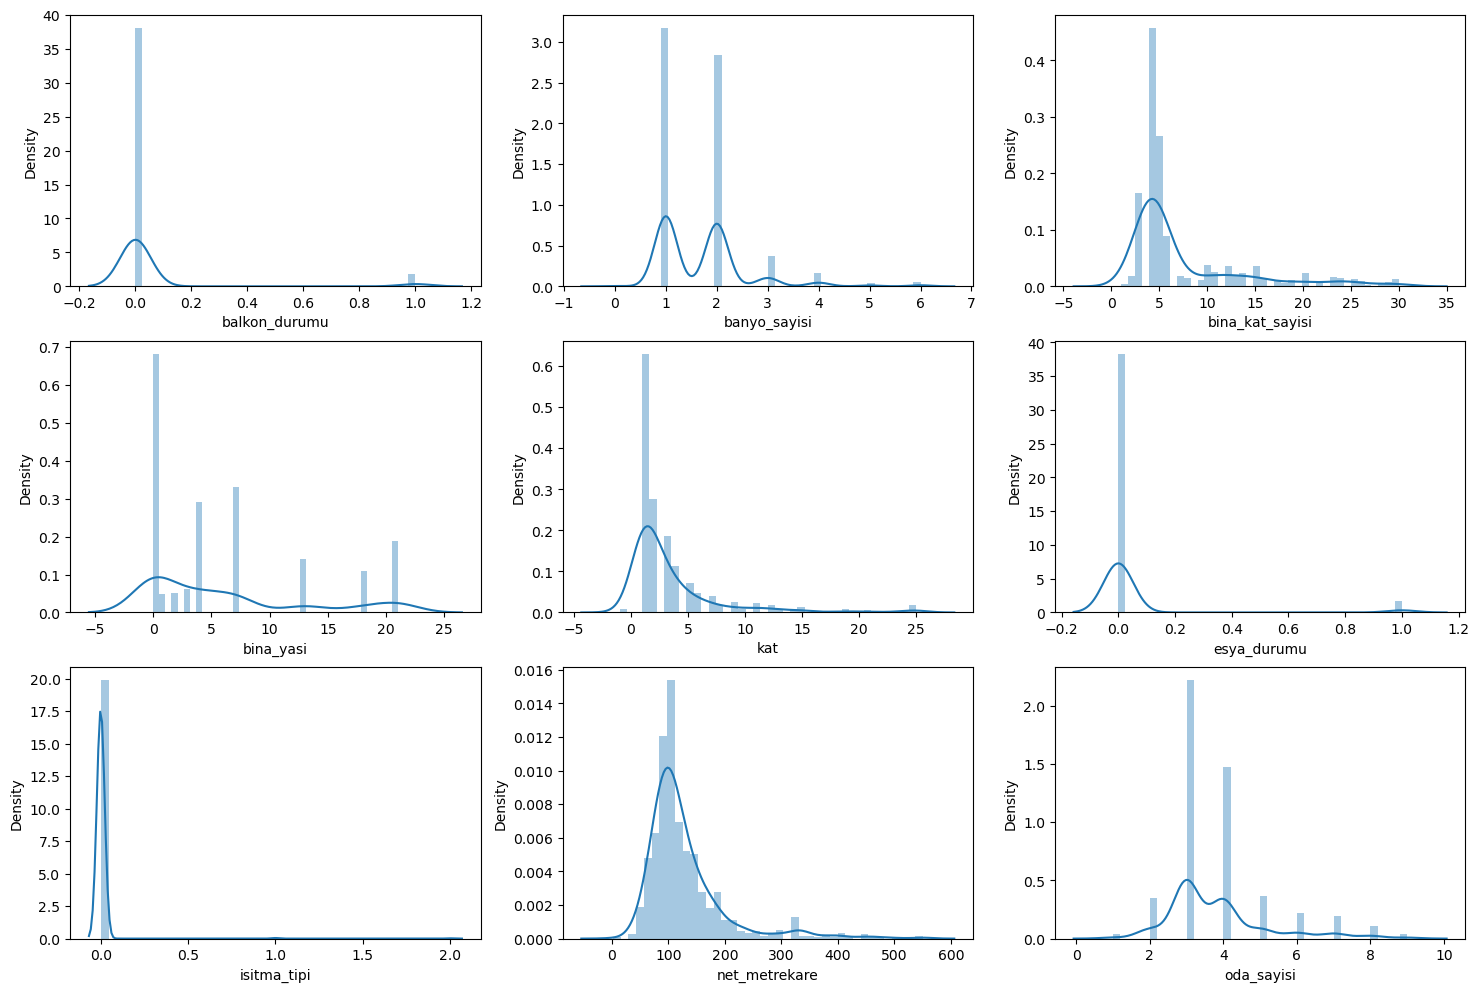

In [41]:
columns = ["balkon_durumu","banyo_sayisi","bina_kat_sayisi","bina_yasi","kat","esya_durumu","isitma_tipi","net_metrekare",
          "oda_sayisi","site","tip","fiyat"]

     

def distplot(nrows, ncols, columns):

    rows=nrows
    cols=ncols

    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 12))

    columns = columns
    index=0

 

    for i in range(rows):
        for j in range(cols):
            sns.distplot(veri[columns[index]], ax=ax[i][j], bins=40)
            index+=1

distplot(3, 3, columns)

In [42]:
veri.to_csv(r"C:\Users\berke\Desktop\berkehan doğan\Algoritmalar\onislenmis_veri.csv",index = False)

# VERİLERİM HAZIR HALE GELDİ.MODEL EĞİTİMİNE BAŞLANABİLİR.

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [44]:
yeni_veri = pd.read_csv("../Algoritmalar/onislenmis_veri.csv")

Bu aşamada amacımız fiyat tahmini olduğu için x değişkenine fiyatsız verileri,y değişkenine ise direkt fiyatın olduğu sütünü yolladık.Train test aşamasında %20 ve %80 olarak bölmeyi uygun gördüm.

In [45]:
from sklearn.model_selection import train_test_split
X = yeni_veri.drop(["fiyat"], axis = 1)
y = yeni_veri["fiyat"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)
print("x_train :", x_train.shape)
print("x_test :", x_test.shape)
print("y_train :", y_train.shape)
print("y_test :", y_test.shape)

x_train : (648, 11)
x_test : (162, 11)
y_train : (648,)
y_test : (162,)


### Linear Regression Model

In [46]:
from sklearn.linear_model import LinearRegression, Lasso
li_re = LinearRegression()
li_re.fit(x_train, y_train)
y_predict = li_re.predict(x_test)
print("MAE : ",mean_absolute_error(y_test,y_predict))
print("RMSE : ",np.sqrt(mean_absolute_error(y_test,y_predict)))
print("R^2 : ",r2_score(y_test,y_predict))

MAE :  1477115.7417265216
RMSE :  1215.3665051030991
R^2 :  0.7767193639279182


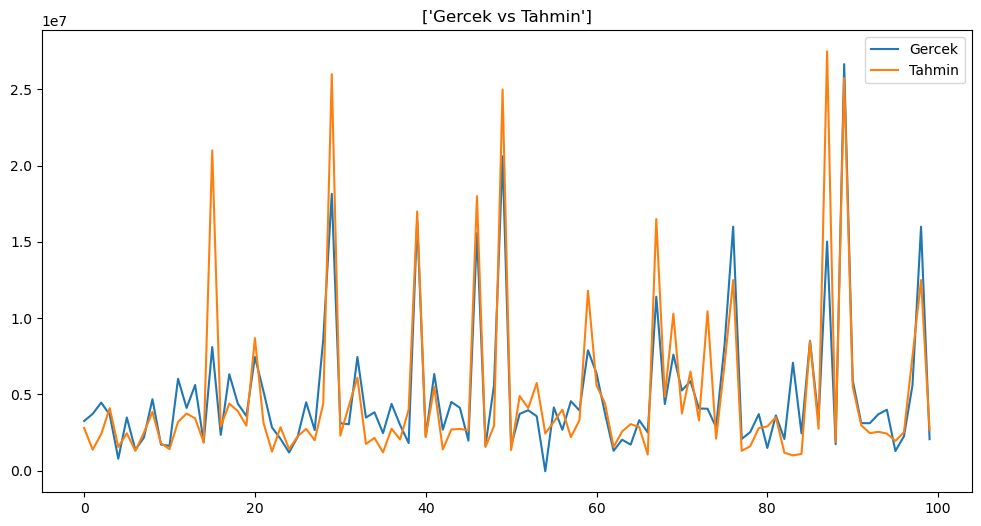

In [47]:
fig =plt.figure(figsize=(12,6))
result = pd.DataFrame({'Tahmin':y_predict,'Gercek':y_test})
result = result.reset_index()
result = result.drop(['index'],axis = 1)
plt.plot(result[:100])
plt.legend(['Gercek','Tahmin'])
plt.title(['Gercek vs Tahmin'])
plt.show()

### Decision Tree Model

In [48]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(criterion = 'squared_error',splitter='best')
dec_tree.fit(x_train,y_train)
y_predict_dec_tree = dec_tree.predict(x_test)
print("MAE : ",mean_absolute_error(y_test,y_predict_dec_tree))
print("RMSE : ",np.sqrt(mean_absolute_error(y_test,y_predict_dec_tree)))
print("R^2 : ",r2_score(y_test,y_predict_dec_tree))

MAE :  1637524.8506760728
RMSE :  1279.6580991327617
R^2 :  0.6242398908152633


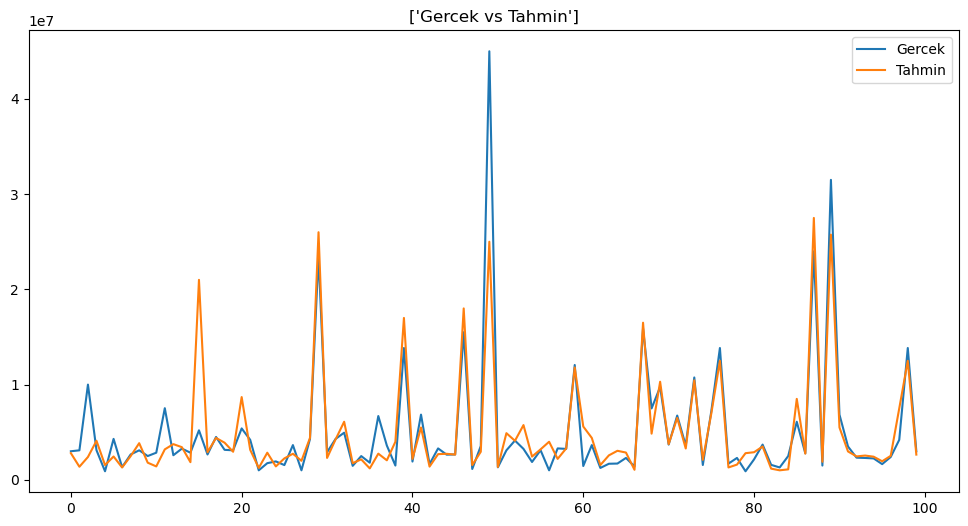

In [49]:
fig =plt.figure(figsize=(12,6))
result = pd.DataFrame({'Tahmin':y_predict_dec_tree,'Gercek':y_test})
result = result.reset_index()
result = result.drop(['index'],axis = 1)
plt.plot(result[:100])
plt.legend(['Gercek','Tahmin'])
plt.title(['Gercek vs Tahmin'])
plt.show()

### Lasso Model

In [50]:
lasso = Lasso()
lasso.fit(x_train,y_train)
y_predict_lasso = lasso.predict(x_test)
print("MAE : ",mean_absolute_error(y_test,y_predict_lasso))
print("RMSE : ",np.sqrt(mean_absolute_error(y_test,y_predict_lasso)))
print("R^2 : ",r2_score(y_test,y_predict_lasso))

MAE :  1477114.7898374472
RMSE :  1215.3661134972651
R^2 :  0.7767197546561357


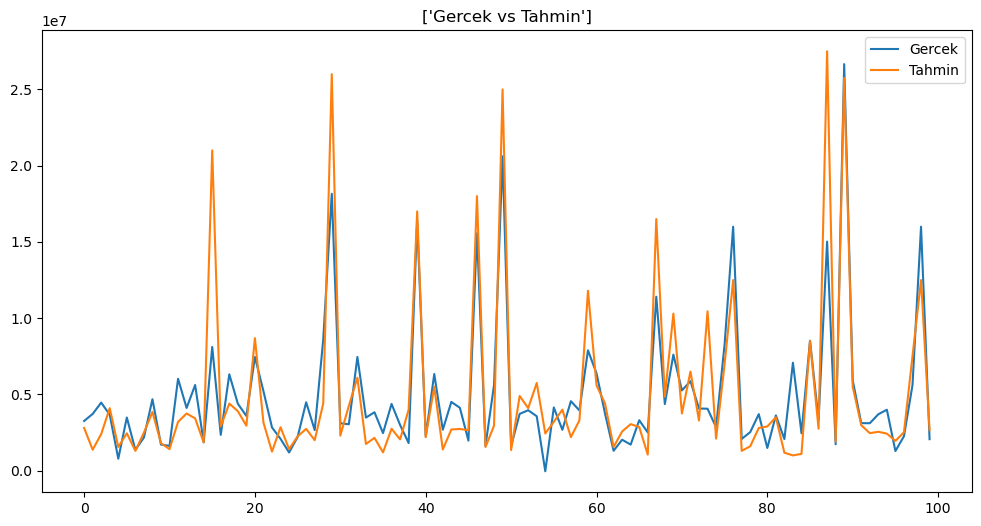

In [51]:
fig =plt.figure(figsize=(12,6))
result = pd.DataFrame({'Tahmin':y_predict_lasso,'Gercek':y_test})
result = result.reset_index()
result = result.drop(['index'],axis = 1)
plt.plot(result[:100])
plt.legend(['Gercek','Tahmin'])
plt.title(['Gercek vs Tahmin'])
plt.show()

### Gradient Boosting Model

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
gbm_model = GradientBoostingRegressor()
gbm_model.fit(x_train,y_train)
y_predict_gbm = gbm_model.predict(x_test)
print("MAE : ",mean_absolute_error(y_test,y_predict_gbm))
print("RMSE : ",np.sqrt(mean_absolute_error(y_test,y_predict_gbm)))
print("R^2 : ",r2_score(y_test,y_predict_gbm))

MAE :  1280136.8737262485
RMSE :  1131.4313384939665
R^2 :  0.8098032189686366


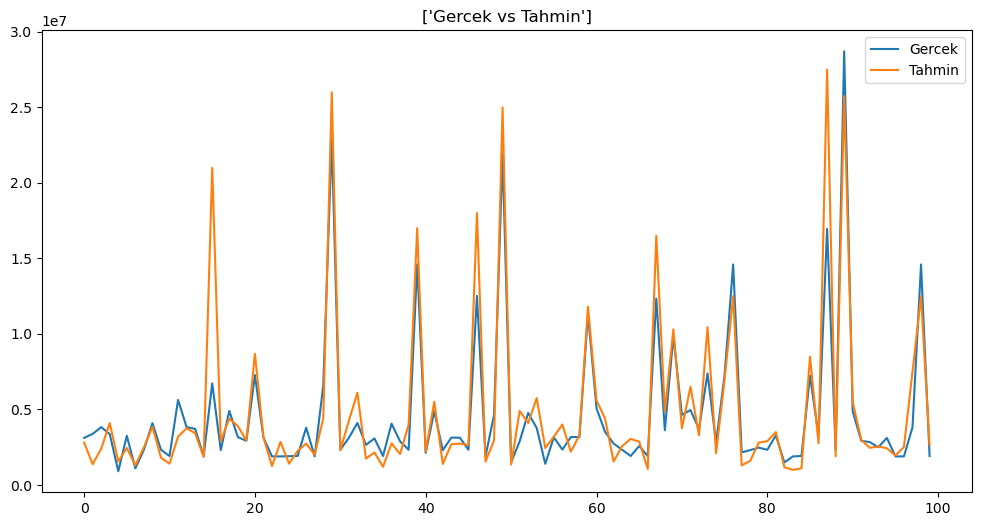

In [53]:
fig =plt.figure(figsize=(12,6))
result = pd.DataFrame({'Tahmin':y_predict_gbm,'Gercek':y_test})
result = result.reset_index()
result = result.drop(['index'],axis = 1)
plt.plot(result[:100])
plt.legend(['Gercek','Tahmin'])
plt.title(['Gercek vs Tahmin'])
plt.show()

### KNN Model

In [54]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(x_train,y_train)
y_predict_knn = knn_model.predict(x_test)
print("MAE : ",mean_absolute_error(y_test,y_predict_knn))
print("RMSE : ",np.sqrt(mean_absolute_error(y_test,y_predict_knn)))
print("R^2 : ",r2_score(y_test,y_predict_knn))

MAE :  1525969.1580246915
RMSE :  1235.3012418129804
R^2 :  0.7655751199224217


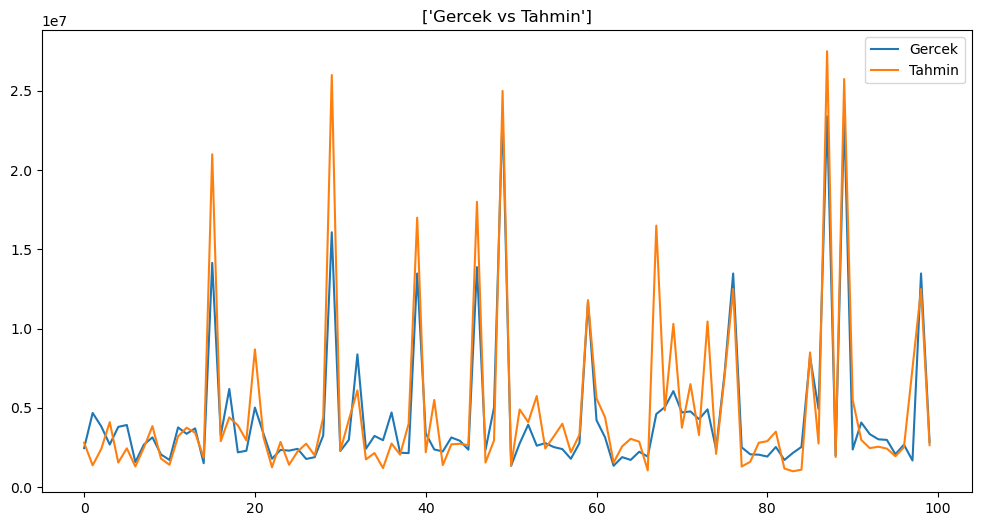

In [55]:
fig =plt.figure(figsize=(12,6))
result = pd.DataFrame({'Tahmin':y_predict_knn,'Gercek':y_test})
result = result.reset_index()
result = result.drop(['index'],axis = 1)
plt.plot(result[:100])
plt.legend(['Gercek','Tahmin'])
plt.title(['Gercek vs Tahmin'])
plt.show()

### CatBoost Model

In [56]:
from catboost import CatBoostRegressor
cat_model = CatBoostRegressor()
cat_model.fit(x_train,y_train)
y_predict_cat_model = cat_model.predict(x_test)
print("MAE : ",mean_absolute_error(y_test,y_predict_cat_model))
print("RMSE : ",np.sqrt(mean_absolute_error(y_test,y_predict_cat_model)))
print("R^2 : ",r2_score(y_test,y_predict_cat_model))

Learning rate set to 0.03823
0:	learn: 7031168.8896371	total: 51.6ms	remaining: 51.5s
1:	learn: 6996205.9502983	total: 52ms	remaining: 25.9s
2:	learn: 6960680.5029310	total: 52.6ms	remaining: 17.5s
3:	learn: 6866054.6509001	total: 53.3ms	remaining: 13.3s
4:	learn: 6832297.1956345	total: 53.7ms	remaining: 10.7s
5:	learn: 6740471.0193519	total: 54.3ms	remaining: 9s
6:	learn: 6691277.7876365	total: 54.9ms	remaining: 7.79s
7:	learn: 6614387.8134517	total: 55.6ms	remaining: 6.89s
8:	learn: 6531616.0050988	total: 56.2ms	remaining: 6.19s
9:	learn: 6463247.0778904	total: 56.9ms	remaining: 5.63s
10:	learn: 6388309.8979630	total: 57.6ms	remaining: 5.18s
11:	learn: 6333472.5473257	total: 58.3ms	remaining: 4.8s
12:	learn: 6292113.3191115	total: 58.9ms	remaining: 4.47s
13:	learn: 6252410.4473420	total: 59.5ms	remaining: 4.19s
14:	learn: 6175435.1882954	total: 60.2ms	remaining: 3.95s
15:	learn: 6144090.4979564	total: 60.7ms	remaining: 3.73s
16:	learn: 6068973.3693422	total: 61.6ms	remaining: 3.56s
1

218:	learn: 2001281.1640824	total: 178ms	remaining: 633ms
219:	learn: 1995935.5150792	total: 178ms	remaining: 632ms
220:	learn: 1993228.0210837	total: 179ms	remaining: 630ms
221:	learn: 1991420.5085536	total: 179ms	remaining: 627ms
222:	learn: 1987193.4018566	total: 180ms	remaining: 626ms
223:	learn: 1983065.1233422	total: 180ms	remaining: 625ms
224:	learn: 1979057.4626159	total: 181ms	remaining: 624ms
225:	learn: 1966794.0537519	total: 182ms	remaining: 622ms
226:	learn: 1956909.4886456	total: 182ms	remaining: 621ms
227:	learn: 1955123.5404347	total: 183ms	remaining: 619ms
228:	learn: 1953372.1574446	total: 183ms	remaining: 617ms
229:	learn: 1942948.1080516	total: 184ms	remaining: 617ms
230:	learn: 1939150.4535296	total: 185ms	remaining: 616ms
231:	learn: 1934606.2647831	total: 186ms	remaining: 615ms
232:	learn: 1932974.4756999	total: 186ms	remaining: 613ms
233:	learn: 1926220.3589763	total: 187ms	remaining: 612ms
234:	learn: 1922682.3649253	total: 188ms	remaining: 611ms
235:	learn: 19

492:	learn: 1335099.2030982	total: 353ms	remaining: 363ms
493:	learn: 1334405.3285239	total: 353ms	remaining: 362ms
494:	learn: 1332869.9787201	total: 354ms	remaining: 362ms
495:	learn: 1330578.1843906	total: 355ms	remaining: 361ms
496:	learn: 1328835.8261335	total: 356ms	remaining: 360ms
497:	learn: 1327761.5069872	total: 356ms	remaining: 359ms
498:	learn: 1326408.2433466	total: 357ms	remaining: 358ms
499:	learn: 1324957.1577379	total: 358ms	remaining: 358ms
500:	learn: 1323067.8315839	total: 358ms	remaining: 357ms
501:	learn: 1321863.0116167	total: 359ms	remaining: 356ms
502:	learn: 1319992.1695124	total: 360ms	remaining: 355ms
503:	learn: 1318078.1138952	total: 360ms	remaining: 354ms
504:	learn: 1316436.4024043	total: 361ms	remaining: 354ms
505:	learn: 1316238.0069653	total: 361ms	remaining: 353ms
506:	learn: 1312761.4069443	total: 362ms	remaining: 352ms
507:	learn: 1312097.3687158	total: 363ms	remaining: 352ms
508:	learn: 1310865.2832055	total: 364ms	remaining: 351ms
509:	learn: 13

762:	learn: 1029732.9031580	total: 529ms	remaining: 164ms
763:	learn: 1028996.1119564	total: 530ms	remaining: 164ms
764:	learn: 1026963.3407743	total: 531ms	remaining: 163ms
765:	learn: 1025699.1644197	total: 531ms	remaining: 162ms
766:	learn: 1024353.5639865	total: 532ms	remaining: 162ms
767:	learn: 1023961.5421426	total: 533ms	remaining: 161ms
768:	learn: 1023834.4403923	total: 533ms	remaining: 160ms
769:	learn: 1022034.2161495	total: 534ms	remaining: 159ms
770:	learn: 1021185.1333143	total: 535ms	remaining: 159ms
771:	learn: 1020893.9362300	total: 535ms	remaining: 158ms
772:	learn: 1020827.7202030	total: 536ms	remaining: 157ms
773:	learn: 1019586.4230410	total: 536ms	remaining: 157ms
774:	learn: 1018119.6108275	total: 537ms	remaining: 156ms
775:	learn: 1017943.8162763	total: 538ms	remaining: 155ms
776:	learn: 1017002.8203693	total: 538ms	remaining: 155ms
777:	learn: 1016402.4709099	total: 539ms	remaining: 154ms
778:	learn: 1015816.5337072	total: 540ms	remaining: 153ms
779:	learn: 10

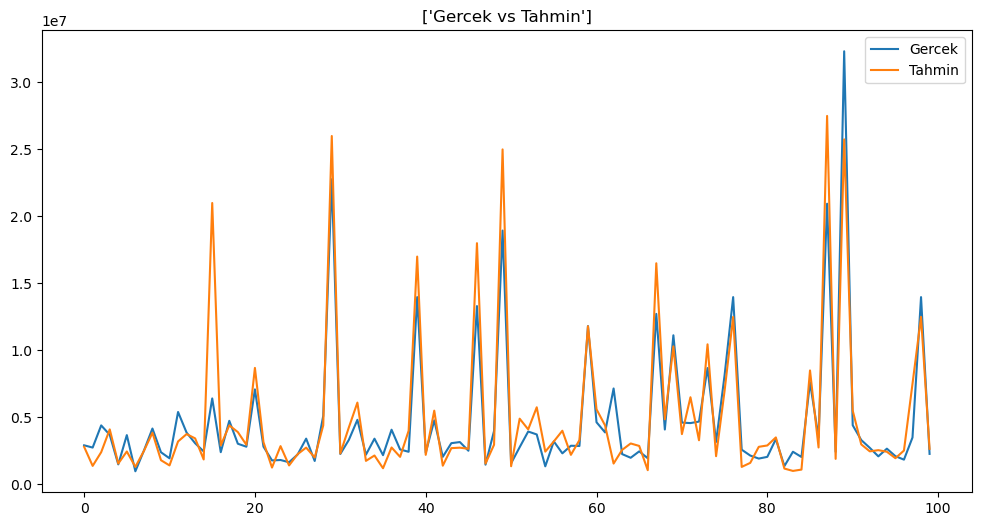

In [57]:
fig =plt.figure(figsize=(12,6))
result = pd.DataFrame({'Tahmin':y_predict_cat_model,'Gercek':y_test})
result = result.reset_index()
result = result.drop(['index'],axis = 1)
plt.plot(result[:100])
plt.legend(['Gercek','Tahmin'])
plt.title(['Gercek vs Tahmin'])
plt.show()

### Random Forest Model

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train,y_train)
y_predict_rf_model = rf_model.predict(x_test)
print("MAE : ",mean_absolute_error(y_test,y_predict_rf_model))
print("RMSE : ",np.sqrt(mean_absolute_error(y_test,y_predict_rf_model)))
print("R^2 : ",r2_score(y_test,y_predict_rf_model))

MAE :  1484166.6543209876
RMSE :  1218.2637868380507
R^2 :  0.7466241495906156


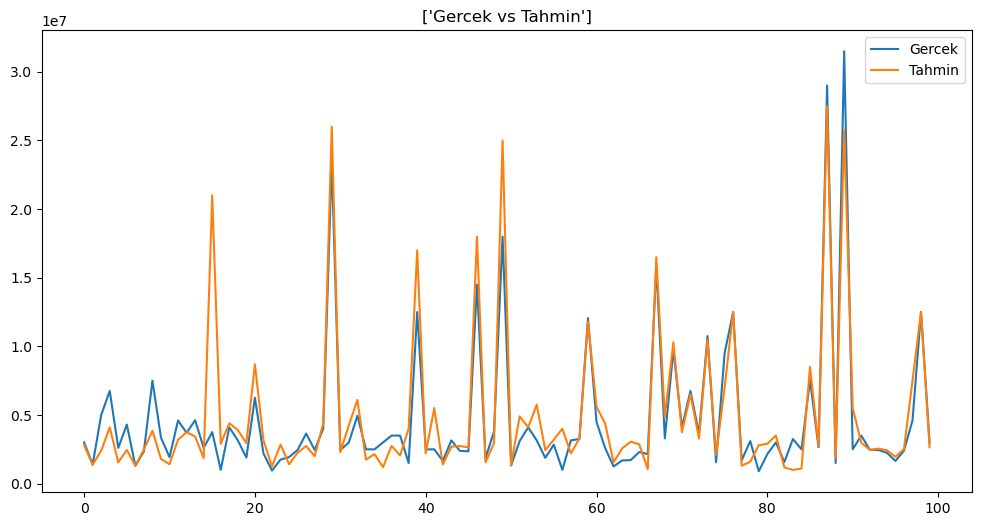

In [59]:
fig =plt.figure(figsize=(12,6))
result = pd.DataFrame({'Tahmin':y_predict_rf_model,'Gercek':y_test})
result = result.reset_index()
result = result.drop(['index'],axis = 1)
plt.plot(result[:100])
plt.legend(['Gercek','Tahmin'])
plt.title(['Gercek vs Tahmin'])
plt.show()

Sonuçları daha düzenli görmek adına tablo haline getirdik.RMSE değeri 0 a ve R2 değeri 1 e en yakın olan model en iyi modelimizdir.

In [60]:
final_RMSE = pd.DataFrame(data = [[1215.36,1282.30,1215.36,1131.43,1235.30,1138.36,1206.82],
                                  [0.776,0.626,0.776,0.809,0.765,0.804,0.708]],
                         
                          columns = ["Linear Regression","Decision Tree","Lasso","GradientBoost","KNeighbors","CatBoost","RandomForest"],
                          index = ["RMSE","R2"])
final_RMSE = final_RMSE.T

cm = sns.light_palette("purple", as_cmap=True)

final_RMSE = final_RMSE.style.background_gradient(cmap=cm)
final_RMSE

,RMSE,R2
Linear Regression,1215.360000,0.776000
Decision Tree,1282.300000,0.626000
Lasso,1215.360000,0.776000
GradientBoost,1131.430000,0.809000
KNeighbors,1235.300000,0.765000
CatBoost,1138.360000,0.804000
RandomForest,1206.820000,0.708000


Tablodan görüldüğü üzere r2 değeri 1'e en yakın olan ve RMSE değeri en düşük olan model GradientBoost çıktı.

## Bu noktadan sonra GradientBoost için GRİD SEARCH kullanıp en iyi parametreleri bulmaya calışacağız

In [61]:
"""params_grid = {
    'n_estimators':[100,200,500,1000],
    'max_depth': [2,3,4,5],
    'learning_rate':[0.01,0.02,0.09],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[2,3,4,5],
    'subsample':[0.5,0.6,0.7,]
}"""


"params_grid = {\n    'n_estimators':[100,200,500,1000],\n    'max_depth': [2,3,4,5],\n    'learning_rate':[0.01,0.02,0.09],\n    'min_samples_split':[2,3,4,5],\n    'min_samples_leaf':[2,3,4,5],\n    'subsample':[0.5,0.6,0.7,]\n}"

In [62]:
"""grid_search = GridSearchCV(GradientBoostingRegressor(), params_grid, cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)"""

'grid_search = GridSearchCV(GradientBoostingRegressor(), params_grid, cv = 5, n_jobs = -1, verbose = 2)\ngrid_search.fit(x_train, y_train)'

In [63]:
#grid_search.best_params_

In [64]:
"""from sklearn.ensemble import GradientBoostingRegressor
gbm_model = GradientBoostingRegressor(learning_rate = 0.02,max_depth = 4 , n_estimators = 100,min_samples_leaf = 3,min_samples_split = 2,subsample = 0.5)
gbm_model.fit(x_train,y_train)
y_predict_gbm = gbm_model.predict(x_test)
print("MAE : ",mean_absolute_error(y_test,y_predict_gbm))
print("RMSE : ",np.sqrt(mean_absolute_error(y_test,y_predict_gbm)))
print("R^2 : ",r2_score(y_test,y_predict_gbm))
fig =plt.figure(figsize=(12,6))
result = pd.DataFrame({'Tahmin':y_predict_gbm,'Gercek':y_test})
result = result.reset_index()
result = result.drop(['index'],axis = 1)
plt.plot(result[:100])
plt.legend(['Gercek','Tahmin'])
plt.title(['Gercek vs Tahmin'])
plt.show()"""

'from sklearn.ensemble import GradientBoostingRegressor\ngbm_model = GradientBoostingRegressor(learning_rate = 0.02,max_depth = 4 , n_estimators = 100,min_samples_leaf = 3,min_samples_split = 2,subsample = 0.5)\ngbm_model.fit(x_train,y_train)\ny_predict_gbm = gbm_model.predict(x_test)\nprint("MAE : ",mean_absolute_error(y_test,y_predict_gbm))\nprint("RMSE : ",np.sqrt(mean_absolute_error(y_test,y_predict_gbm)))\nprint("R^2 : ",r2_score(y_test,y_predict_gbm))\nfig =plt.figure(figsize=(12,6))\nresult = pd.DataFrame({\'Tahmin\':y_predict_gbm,\'Gercek\':y_test})\nresult = result.reset_index()\nresult = result.drop([\'index\'],axis = 1)\nplt.plot(result[:100])\nplt.legend([\'Gercek\',\'Tahmin\'])\nplt.title([\'Gercek vs Tahmin\'])\nplt.show()'

Denediğim grid searchte sonuc daha kötü çıktığı için bunu almıyorum varsayılan hali ile alacağım.

Burada modelimizi aldık ve pkl dosyası olarak kaydettik.

In [65]:
import joblib
joblib.dump(gbm_model,"gbm_model.pkl")

['gbm_model.pkl']